In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

c:\Users\Xinyu\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
c:\Users\Xinyu\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:


df = pd.read_csv('./data/ums_viz.csv')
df_perf = pd.read_pickle('descriptions.pkl')
df_perf.columns.values[0] = 'perf_name'

df['perf_name'] = df['perf_name'].apply(lambda x: x.strip())
df_perf['perf_name'] = df_perf['perf_name'].apply(lambda x: x.strip())

df['per_seat'] = df['tck_amt']/df['num_seats']
df_group = df.groupby('perf_name')

# Add a whole bunch of new performance-level features

# mean ticket amount, number of seats, price per seat
df_tmp = df_group['tck_amt', 'num_seats', 'per_seat'].mean().reset_index()
df_tmp = df_tmp.rename(columns = {'tck_amt': 'mean_tck_amt', 'num_seats': 'mean_num_seats', 'per_seat': 'mean_per_seat'})

df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

# max ticket amount, number of seats, price per seat
df_tmp = df_group['tck_amt', 'num_seats', 'per_seat'].max().reset_index()
df_tmp = df_tmp.rename(columns = {'tck_amt': 'max_tck_amt', 'num_seats': 'max_num_seats', 'per_seat': 'max_per_seat'})
df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

# total number of seats
df_tmp = df_group['num_seats'].count().reset_index()
df_tmp = df_tmp.rename(columns = {'num_seats': 'count_tck_amt'})
df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

In [15]:
df_perf.perf_name

0       The Infernal Comedy
1          Yuja Wang, piano
2       London Philharmonic
3          Hamburg Symphony
4      Chicago Symphony Orc
5      San Francisco Sympho
6        Pavel Haas Quartet
7          Ballet Preljocaj
8               Joshua Bell
9            Murray Perahia
10      Mariinsky Orchestra
11     Detroit Symphony Orc
12     New York Philharmoni
13          Artemis Quartet
14      Anne-Sophie Mutter,
15           Bobby McFerrin
16            Alison Balsom
17       SITI: Trojan Women
18           Audra McDonald
19     Andras Schiff, piano
20            Apollo's Fire
21      Joshua Bell, violin
22     St Petersburg Philha
23      Israel Philharmonic
24     Akademie fur Alte Mu
25         Olga Kern, piano
26        Kremerata Baltica
27     Tara Erraught, mezzo
28     Denis Matsuev, piano
29       Handel's Radamisto
               ...         
113        Ensemble Basiani
114    Jason Moran's Fats W
115    Dan Zanes and Friend
116               Max Raabe
117    NT - Last of 

In [3]:
df.head()

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat
0,1111,1979-08-06 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
1,1111,1979-08-06 00:00:00.000,Household,"Yuja Wang, piano",2011-10-09 16:00:00.000,80.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,40.0
2,1111,1979-08-06 00:00:00.000,Household,London Philharmonic,2011-12-06 19:30:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
3,1111,1979-08-06 00:00:00.000,Household,Hamburg Symphony,2012-01-29 16:00:00.000,92.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,46.0
4,1111,1979-08-06 00:00:00.000,Household,Chicago Symphony Orc,2012-03-09 20:00:00.000,140.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,70.0


In [2]:
topics = pd.read_csv('Topics.csv', header = None, names = ['perf_name', 'topic'])

In [12]:
topics.head()

,perf_name,topic
0,NT - Coriolanus,Other
1,"NT - One Man, Two Gu",Other
2,Apollo's Fire,Choral
3,Ensemble Basiani,Other
4,Schola Cantorum of V,Other


In [3]:
## combine topics and df

df_topic = df.merge(topics, on='perf_name')
df_topic.head()

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat,topic
0,1111,1979-08-06 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0,Choral
1,1115,1988-02-18 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,136.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Phone,2011-06-03 00:00:00.000,48105,68.0,Choral
2,1131,1988-02-26 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,136.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Phone,2011-05-19 00:00:00.000,537112216,68.0,Choral
3,1153,1988-02-10 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Phone,2011-06-06 00:00:00.000,48104,56.0,Choral
4,1166,1988-02-26 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,120.0,2,Hill Auditorium,Adult,Regular Prices,Walk Up,Walk Up - League,2011-08-15 10:00:48.000,48104,60.0,Choral


In [4]:
unique_topics = df_topic.topic.unique()
print unique_topics

['Choral' 'Chamber' 'Dance' 'Other' 'Jazz']


In [5]:
df_topic['acct_created'] = pd.to_datetime(df_topic['acct_created'])
df_topic['perf_dt'] = pd.to_datetime(df_topic['perf_dt'])
acct_duration = df_topic.perf_dt - df_topic.acct_created
df_topic['acct_duration'] = acct_duration.apply(lambda x: x.days)  # in days

In [6]:
df_topic['acct_duration_years'] = df_topic.acct_duration//365

### Distribution of account existing time

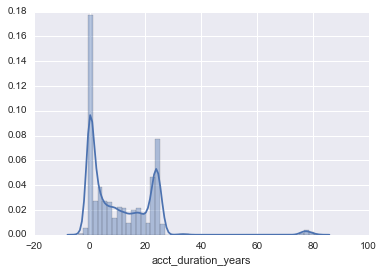

In [7]:
sns.distplot(df_topic.acct_duration_years)

According to this plot, we are going to divide the customers into the following groups:

- customers <= 2 years
- customers >= 3 years but <= 10 years
- customers >= 11 years but <= 20 years
- customers >= 21 years

### How do different customer groups differ in their purchase type (topic)

In [8]:
group1 = df_topic[df_topic.acct_duration_years<=2].topic
group2 = df_topic[(df_topic.acct_duration_years>=3) & (df_topic.acct_duration_years<=10)].topic
group3 = df_topic[(df_topic.acct_duration_years>=11) & (df_topic.acct_duration_years<=20)].topic
group4 = df_topic[df_topic.acct_duration_years>=21].topic

In [9]:
def calculate_prop(group):
    result = []
    for tpc in unique_topics:
        result.append(float(sum(group==tpc))/len(group))
    return result

In [10]:
x = []
x.append(calculate_prop(group1))
x.append(calculate_prop(group2))
x.append(calculate_prop(group3))
x.append(calculate_prop(group4))

In [11]:
x = pd.DataFrame(np.mat(x), columns=unique_topics, index = ['group1 <= 2', 'group2 [3, 10]', 'group3 [11, 20]', 'group4 >=21'])

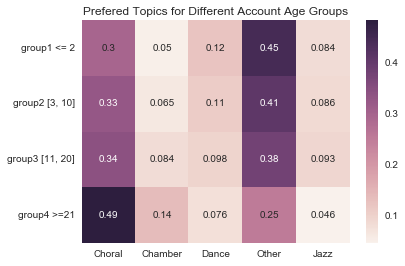

In [12]:
import matplotlib.pyplot as plt
ax = plt.axes()
sns.heatmap(x, annot=True)
ax.set_title('Prefered Topics for Different Account Age Groups')
plt.show()

In [13]:
#group1 = df_topic[df_topic.acct_duration_years<=2].topic
#group2 = df_topic[(df_topic.acct_duration_years>=3) & (df_topic.acct_duration_years<=10)].topic
#group3 = df_topic[(df_topic.acct_duration_years>=11) & (df_topic.acct_duration_years<=20)].topic
#group4 = df_topic[df_topic.acct_duration_years>=21].topic

df_topic['acct_group'] = pd.Series(np.empty(df_topic.shape[0]))

In [14]:
df_topic.ix[df_topic.acct_duration_years<=2, 'acct_group'] = 'group1 <=2'
df_topic.ix[(df_topic.acct_duration_years>=3) & (df_topic.acct_duration_years<=10), 'acct_group'] = 'group2 [3, 10]'
df_topic.ix[(df_topic.acct_duration_years>=11) & (df_topic.acct_duration_years<=20), 'acct_group'] = 'group3 [11, 20]'
df_topic.ix[df_topic.acct_duration_years>=21, 'acct_group'] = 'group4 >=21'

In [15]:
df_topic.head()

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat,topic,acct_duration,acct_duration_years,acct_group
0,1111,1979-08-06,Household,The Infernal Comedy,2011-10-01 20:00:00,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0,Choral,11744,32,group4 >=21
1,1115,1988-02-18,Household,The Infernal Comedy,2011-10-01 20:00:00,136.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Phone,2011-06-03 00:00:00.000,48105,68.0,Choral,8626,23,group4 >=21
2,1131,1988-02-26,Household,The Infernal Comedy,2011-10-01 20:00:00,136.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Phone,2011-05-19 00:00:00.000,537112216,68.0,Choral,8618,23,group4 >=21
3,1153,1988-02-10,Household,The Infernal Comedy,2011-10-01 20:00:00,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Phone,2011-06-06 00:00:00.000,48104,56.0,Choral,8634,23,group4 >=21
4,1166,1988-02-26,Household,The Infernal Comedy,2011-10-01 20:00:00,120.0,2,Hill Auditorium,Adult,Regular Prices,Walk Up,Walk Up - League,2011-08-15 10:00:48.000,48104,60.0,Choral,8618,23,group4 >=21


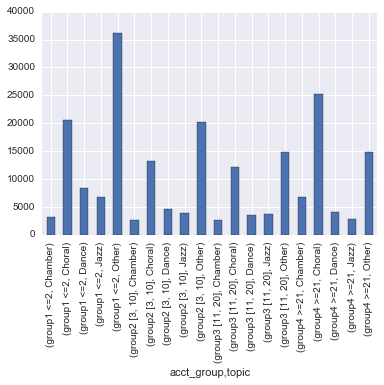

In [16]:
df_topic['num_seats'].groupby([df_topic.acct_group, df_topic.topic]).sum().plot(kind='bar', stacked=True)

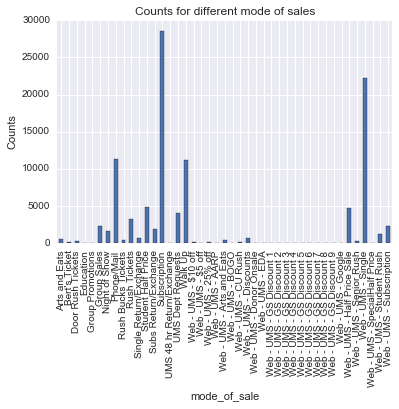

In [17]:
df_topic['mode_of_sale'].groupby(df_topic['mode_of_sale']).count().plot(kind='bar')
plt.title('Counts for different mode of sales')
plt.ylabel('Counts')

In [50]:
x = df_topic['topic'].groupby([df_topic['topic'], df_topic['mode_of_sale']]).count()

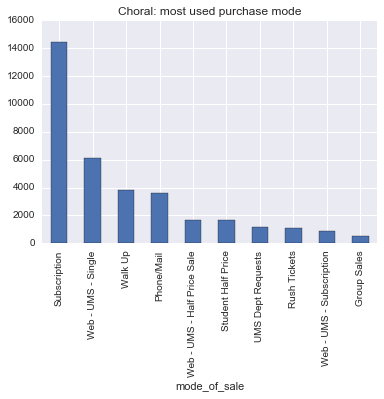

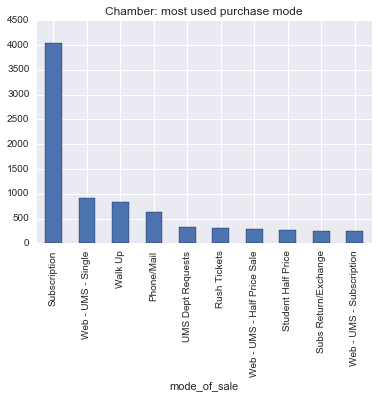

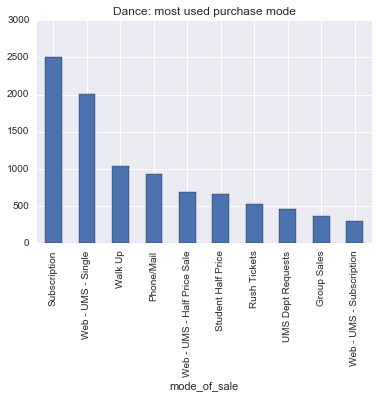

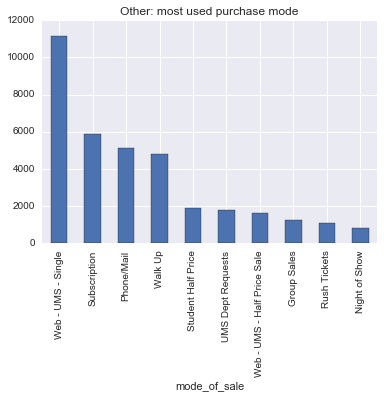

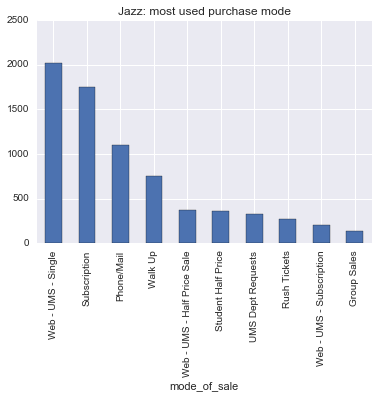

In [54]:
for tpc in unique_topics:
    fig = plt.figure()
    x[tpc].sort_values(inplace = False)[:-11:-1].plot(kind='bar')
    plt.title(tpc+': most used purchase mode')

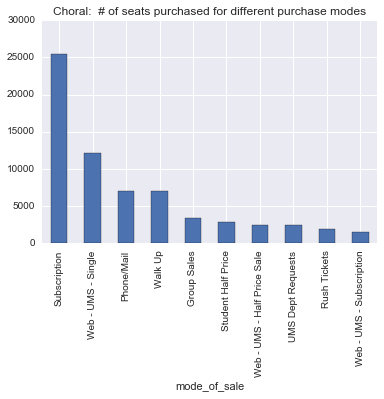

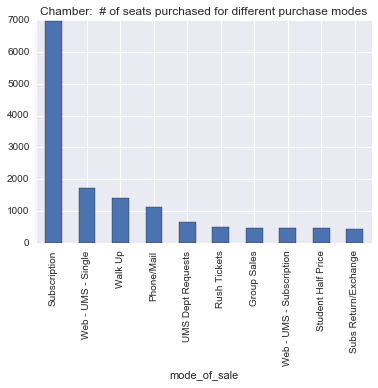

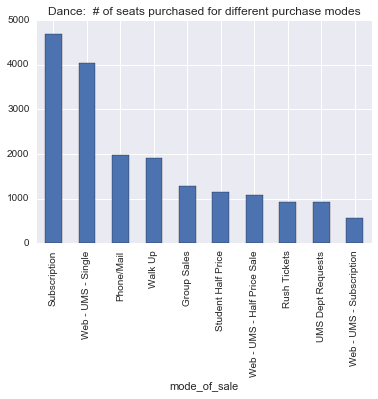

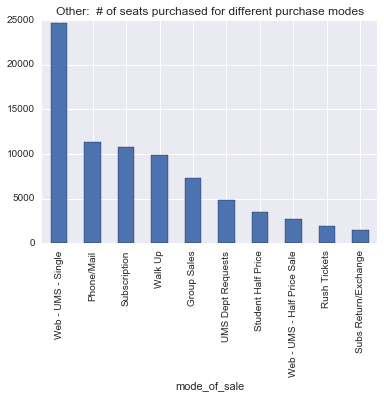

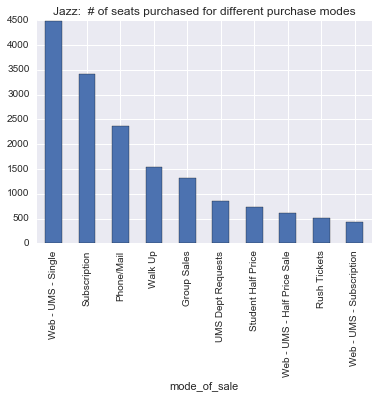

In [58]:
x = df_topic['num_seats'].groupby([df_topic['topic'], df_topic['mode_of_sale']]).sum()
for tpc in unique_topics:
    fig = plt.figure()
    x[tpc].sort_values(inplace = False)[:-11:-1].plot(kind='bar')
    plt.title(tpc+':  # of seats purchased for different purchase modes')

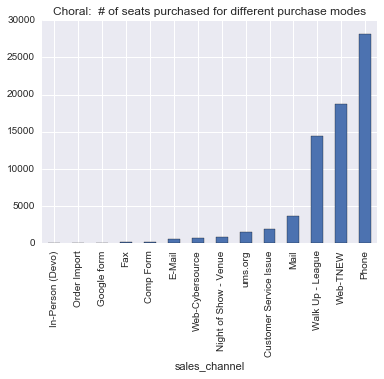

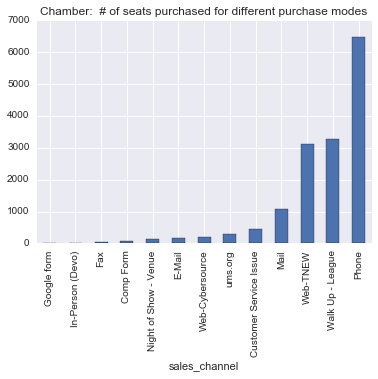

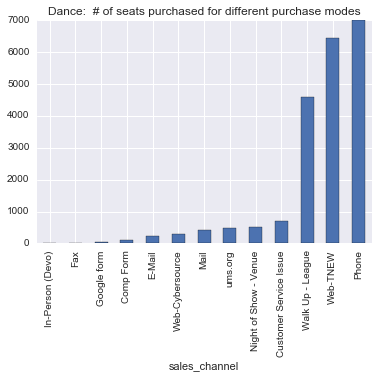

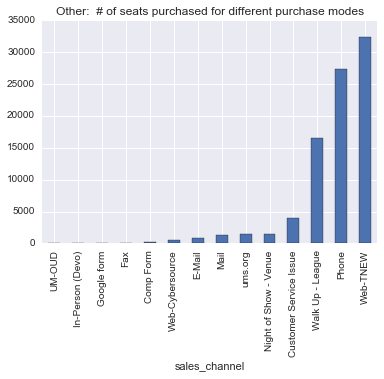

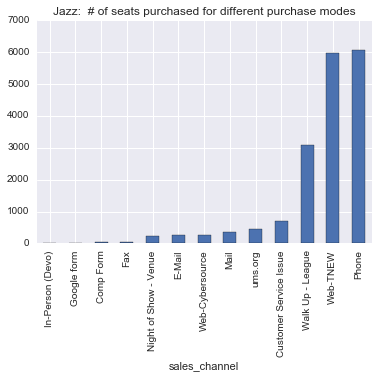

In [73]:
x = df_topic['num_seats'].groupby([df_topic['topic'], df_topic['sales_channel']]).sum()
for tpc in unique_topics:
    fig = plt.figure()
    x[tpc].sort_values(inplace = False).plot(kind='bar')
    plt.title(tpc+':  # of seats purchased for different sales channel')

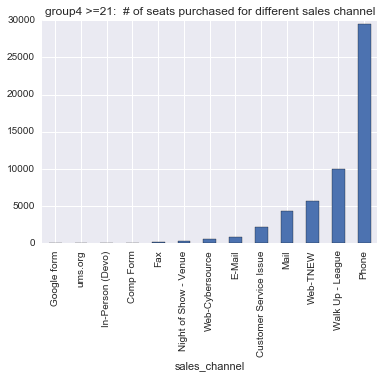

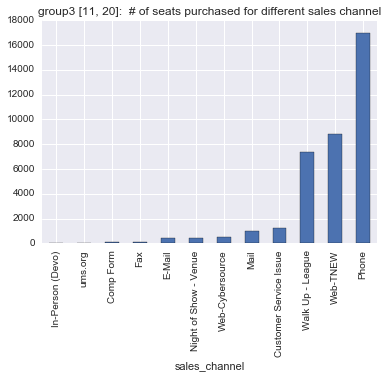

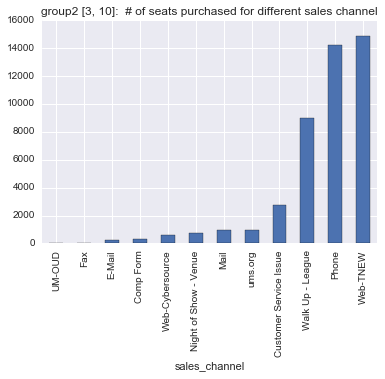

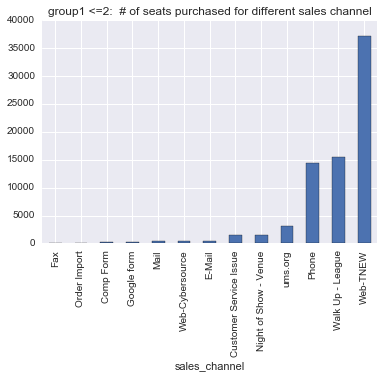

In [76]:
x = df_topic['num_seats'].groupby([df_topic['acct_group'], df_topic['sales_channel']]).sum()
for tpc in df_topic.acct_group.unique():
    fig = plt.figure()
    x[tpc].sort_values(inplace = False).plot(kind='bar')
    plt.title(tpc+':  # of seats purchased for different sales channel')

### Postal code distribution

In [87]:
def change_zip_code(x):
    if len(x) == 9:
        return x[:6]
    else:
        return x

In [91]:
df_topic['simple_postal_code'] = df_topic.postal_code.apply(change_zip_code)

In [93]:
def loc_name(zip_code):
    if len(zip_code) == 5:
        return 'US'
    elif len(zip_code) == 6:
        return 'CAN'
    else:
        return 'OTHER'

In [95]:
df_topic['bill_country'] = df.postal_code.apply(loc_name)

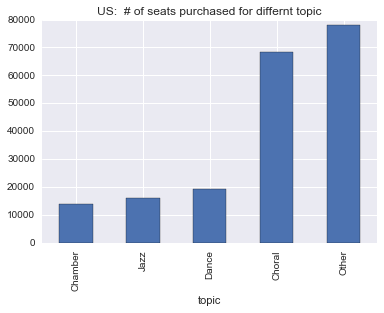

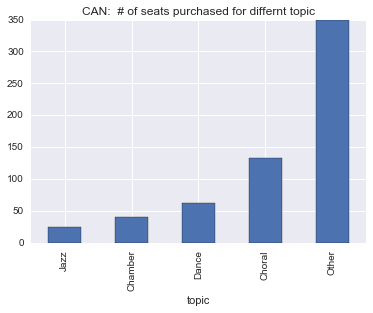

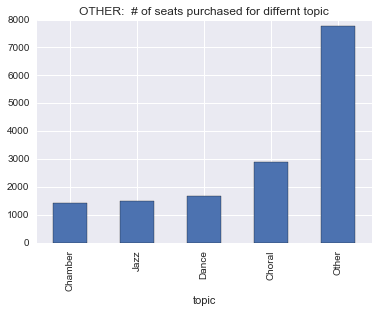

In [100]:
x = df_topic['num_seats'].groupby([df_topic.bill_country, df_topic.topic]).sum()

for coun in ['US', 'CAN', 'OTHER']:
    fig = plt.figure()
    x[coun].sort_values(inplace = False).plot(kind='bar')
    plt.title(coun +':  # of seats purchased for differnt topic')    